In [1]:
import openai
import tensorflow as tf
import pandas as pd

In [14]:
gpt_data = pd.read_csv('f22_gpt2_refined.csv')
t5_data = pd.read_csv('f22_short_answer_e2e_qg.csv')

In [4]:
import os
os.environ['OPENAI_API_KEY'] = ''

In [17]:
import time

In [5]:
openai.api_key = ''

In [15]:
def predict(row):
    question = row['Question']
    ft_model = 'ada:ft-personal-2023-04-24-01-17-14'
    res = openai.Completion.create(model=ft_model, prompt=question, max_tokens=1, temperature=0, logprobs=2)
    time.sleep(1)
    return res['choices'][0]['text']

In [18]:
gpt_data['predicted_label'] = gpt_data.apply (lambda row: predict(row), axis=1)

In [19]:
display(gpt_data)

,Unit,Module,Title,Subheaders,Paragraph,Question,predicted_label
0,Advanced Natural Language Processing,BERT,Bidirectional Encoder Representations from Tra...,NaN,Both the encoder and the decoder stacks form a...,The decoder and the encoder are used together ...,1
1,Advanced Natural Language Processing,BERT,Bidirectional Encoder Representations from Tra...,NaN,Encoder models use only the encoder of a Trans...,These models are often characterized as having...,0
2,Advanced Natural Language Processing,BERT,Bidirectional Encoder Representations from Tra...,NaN,The pretraining of these models usually revolv...,"In contrast to the pretraining of sentences, w...",1
3,Advanced Natural Language Processing,BERT,Bidirectional Encoder Representations from Tra...,NaN,The pretraining of decoder models usually revo...,What does decoder models predict?,1
4,Advanced Natural Language Processing,BERT,Bidirectional Encoder Representations from Tra...,NaN,These models are best suited for tasks involvi...,Text generation is a part of what type of work?,0
...,...,...,...,...,...,...,...
715,Advanced Natural Language Processing,[Research Paper] Attention is All You Need,Attention is All You Need,Who are the papers' authors? Why are they qual...,Step 3 is similar to Step 1 but carried out on...,The output sequence tokens are used to store t...,1
716,Collecting and Understanding Data,Ethics of Data Science,Informed Consent,NaN,"Begun in 1932, a study conducted by the United...",Tuskegee University was located in what state?,1
717,Collecting and Understanding Data,Ethics of Data Science,Informed Consent,NaN,The subjects were instructed to make regular v...,The treatment was intended to help patients wi...,0
718,Collecting and Understanding Data,Ethics of Data Science,Informed Consent,NaN,"By the 1950s, when it became clear that penici...",In what year did the HEW terminate the experim...,1


In [20]:
gpt_data.to_csv('f22_gpt2_refined_with_predictions.csv')

In [26]:
def predict(row):
    question = row['Generated Question']
    ft_model = 'ada:ft-personal-2023-04-24-01-17-14'
    res = openai.Completion.create(model=ft_model, prompt=question, max_tokens=1, temperature=0, logprobs=2)
    time.sleep(1)
    return res['choices'][0]['text']

In [28]:
t5_data = t5_data.dropna(axis=0, subset=['Generated Question'])

In [30]:
t5_data['predicted_label'] = t5_data.apply(lambda row: predict(row), axis=1)

C:\Users\peter\AppData\Local\Temp\ipykernel_11596\1389653241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_data['predicted_label'] = t5_data.apply(lambda row: predict(row), axis=1)


In [33]:
t5_data.to_csv('f22_short_answer_e2e_qg_with_predictions.csv')

In [38]:
bert_data = pd.read_csv('f22_bert2bert.csv')
bert_data = bert_data.dropna(axis=0, subset=['Text','answer'])

In [39]:
def predict(row):
    question = row['questions']
    ft_model = 'ada:ft-personal-2023-04-24-01-17-14'
    res = openai.Completion.create(model=ft_model, prompt=question, max_tokens=1, temperature=0, logprobs=2)
    time.sleep(1)
    return res['choices'][0]['text']

In [40]:
bert_data['predicted_label'] = bert_data.apply(lambda row: predict(row), axis=1)

In [43]:
bert_data.to_csv('f22_bert_to_bert_with_predictions.csv')

In [41]:
print(gpt_data['predicted_label'].value_counts())
print(t5_data['predicted_label'].value_counts())
print(bert_data['predicted_label'].value_counts())

 1    474
 0    246
Name: predicted_label, dtype: int64
 1      1621
 0       401
com        1
 The       1
Name: predicted_label, dtype: int64
 1       3822
 0        356
 mean       1
Name: predicted_label, dtype: int64


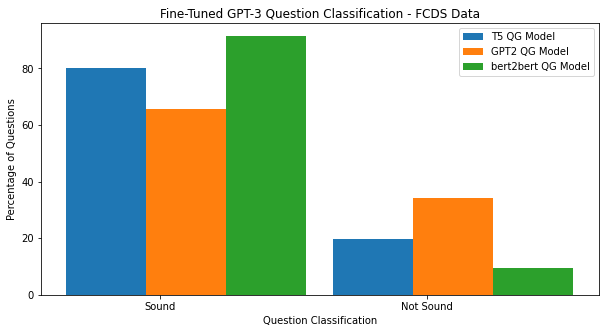

In [42]:
import numpy as np
import matplotlib.pyplot as plt
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (80.2, 19.8)
# Specify the values of orange bars (height)
orange_bar = (65.8, 34.2)

green_bar = (91.5,9.5)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='T5 QG Model')
plt.bar(ind + width, orange_bar, width, label='GPT2 QG Model')
plt.bar(ind + width + width,green_bar, width, label='bert2bert QG Model' )

plt.xlabel('Question Classification')
plt.ylabel('Percentage of Questions')
plt.title('Fine-Tuned GPT-3 Question Classification - FCDS Data')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 1.5, ('Sound', 'Not Sound'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()